# Natural Language Processing with python and medkit

medkit (github: https://github.com/TeamHeka/medkit, documentation: https://medkit.readthedocs.io/en/stable/) is library dedicated to the treatment of clinical data.

For the moment, mekdit is mainly dedicated to two types of data: text and audio data. For texts, resources provided are mostly developed in French, but the library could be used in other languages.

## Installing medkit

In [ ]:
!pip3 install medkit-lib[optional]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.9/279.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.7/208.7 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (set

## Downloading a corpus of documents

In [ ]:
!mkdir 01_data
!wget https://github.com/neurazlab/mtsamplesFR/raw/master/data/mtsamples.csv -O 01_data/mtsamples.csv
!wget https://raw.githubusercontent.com/BastienRance/Teaching/main/Products.txt -O 01_data/Products.txt
!wget https://raw.githubusercontent.com/BastienRance/Teaching/main/hp_synonyms.txt -O 01_data/hp_synonyms.txt
!wget https://raw.githubusercontent.com/BastienRance/Teaching/main/hp_terms.txt -O 01_data/hp_terms.txt

--2024-01-09 00:12:30--  https://github.com/neurazlab/mtsamplesFR/raw/master/data/mtsamples.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/neurazlab/mtsamplesFR/master/data/mtsamples.csv [following]
--2024-01-09 00:12:30--  https://raw.githubusercontent.com/neurazlab/mtsamplesFR/master/data/mtsamples.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17007236 (16M) [text/plain]
Saving to: ‘01_data/mtsamples.csv’

01_data/mtsamples.c 100%[===================>]  16.22M  --.-KB/s    in 0.04s   

2024-01-09 00:12:32 (400 MB/s) - ‘01_data/mtsamples.csv’ saved [17007236/17007236]



## Reading the documents
And printing the first document

In [ ]:
import pandas as pd

docs = pd.read_csv('01_data/mtsamples.csv')

The *iloc* function, allows to select the first row of the data frame

In [ ]:
print(docs.iloc[0]['transcription'])

SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,L

Visualisation de l'objet document :

In [ ]:
docs.iloc[0]

Unnamed: 0                                                           0
description           A 23-year-old white female presents with comp...
medical_specialty                                 Allergy / Immunology
sample_name                                         Allergic Rhinitis 
transcription        SUBJECTIVE:,  This 23-year-old white female pr...
keywords             allergy / immunology, allergic rhinitis, aller...
Name: 0, dtype: object

## Creating your first medkit document

In [ ]:
from medkit.core.text import TextDocument

doc = TextDocument(text=docs.iloc[0]['transcription'])
print(doc.text)

SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,L

### Using regular expressions to extract vitals
Let's first extract vitals (weight, blood pressure, size....) using regular expression.

In [ ]:
from medkit.text.ner import RegexpMatcher, RegexpMatcherRule

regexp_rules = [
    RegexpMatcherRule(regexp=r"[0-9]+([.,][0-9]+)?\s(pounds|kg)", label="weight"),
    RegexpMatcherRule(regexp=r"[0-9]+", label="number"), # change this rule to detect blood pressure (the form is usually 120/80
    RegexpMatcherRule(regexp=r"(IMC|BMI)( )?(:|=)( )?[0-9]{2}", label="BMI")
    # Add a rule capturing BMI values
    #
]
regexp_matcher = RegexpMatcher(rules=regexp_rules)

The code above creates a matcher. The matcher itself does nothing. To use the matcher, it has to run on the document

In [ ]:
entities = regexp_matcher.run([doc.raw_segment])

Let's visualize, the entities detected by the regular expressions:

In [ ]:
entities = regexp_matcher.run([doc.raw_segment])

In [ ]:
for entity in entities:
    print(f"text={entity.text!r}, spans={entity.spans}, label={entity.label}")

text='130 pounds', spans=[Span(start=775, end=785)], label=weight
text='23', spans=[Span(start=19, end=21)], label=number
text='130', spans=[Span(start=775, end=778)], label=number
text='124', spans=[Span(start=805, end=808)], label=number
text='78', spans=[Span(start=809, end=811)], label=number
text='1', spans=[Span(start=1053, end=1054)], label=number
text='2', spans=[Span(start=1222, end=1223)], label=number


Technical action to create document annotations using the detected entities (mandatory for visualization, but not important to understand).

In [ ]:
for entity in entities:
    doc.anns.add(entity)

In [ ]:
from spacy import displacy
from medkit.text.spacy.displacy_utils import medkit_doc_to_displacy

colors = {'weight': "#85C1E9", "number": "#ff6961"}
options = {"ents": ['weight', 'number'], "colors": colors}

displacy_data = medkit_doc_to_displacy(doc)
displacy.render(displacy_data, manual=True, jupyter=True, style="ent", options=options)

#### Exercice :

Modify the code above to capture IMC, blood pressure
and the age of the patients

# Extracting drugs using a dictionary

We will rely on a list of drugs provided by the US FDA to build a dictionnary (https://www.fda.gov/drugs/drug-approvals-and-databases/drugsfda-data-files)

### Step 1 - constructing a dictionary of drug names
Read the Products file, and identify the columns of interest

In [ ]:
import pandas as pd

drugs = pd.read_csv("01_data/Products.txt", sep="\t", on_bad_lines='skip')
drugs.iloc[0]

ApplNo                                             4
ProductNo                                          4
Form                       SOLUTION/DROPS;OPHTHALMIC
Strength                                          1%
ReferenceDrug                                      0
DrugName                                   PAREDRINE
ActiveIngredient     HYDROXYAMPHETAMINE HYDROBROMIDE
ReferenceStandard                                0.0
Name: 0, dtype: object

In [ ]:
# Print the size of the dataset, here 46k brand names
len(drugs)

34683

### Step 2 - Build the dictionary using the IAMsystem matcher

In [ ]:
drugs.keys()

Index(['ApplNo', 'ProductNo', 'Form', 'Strength', 'ReferenceDrug', 'DrugName',
       'ActiveIngredient', 'ReferenceStandard'],
      dtype='object')

In [ ]:
from iamsystem import Matcher
from iamsystem import ESpellWiseAlgo

from medkit.text.ner import RegexpMatcher, RegexpMatcherRule
from medkit.text.ner.iamsystem_matcher import IAMSystemMatcher
from medkit.text.ner.iamsystem_matcher import MedkitKeyword

keywords_list=[]
# Creation of the list of terms to be searched
for i in range(0, len(drugs)):
    keywords_list.append(MedkitKeyword(label=drugs.at[i, 'DrugName'], kb_id=drugs.at[i, 'ApplNo'], kb_name="FDA", ent_label='drug'))
    #keywords_list.append(MedkitKeyword(label=drugs.at[i, 'ActiveIngredient'], kb_id=drugs.at[i, 'ApplNo'], kb_name="FDA", ent_label='drug'))

matcher = Matcher.build(
    keywords=keywords_list,
    spellwise=[dict(measure=ESpellWiseAlgo.LEVENSHTEIN,max_distance=1,min_nb_char=10,)],
    stopwords=["and"],
    w=2,
)

In [ ]:
iam_matcher = IAMSystemMatcher(matcher = matcher, attrs_to_copy = ["is_negated", "family"])

In [ ]:
entities = iam_matcher.run([doc.raw_segment])

for entity in entities:
    print(f"text={entity.text!r}, spans={entity.spans}, label={entity.label}")

text='Claritin', spans=[Span(start=200, end=208)], label=drug
text='Zyrtec', spans=[Span(start=214, end=220)], label=drug
text='Allegra', spans=[Span(start=303, end=310)], label=drug
text='Ortho Tri Cyclen', spans=[Span(start=660, end=665), ModifiedSpan(length=1, replaced_spans=[]), Span(start=666, end=669), ModifiedSpan(length=1, replaced_spans=[]), Span(start=670, end=676)], label=drug
text='Allegra', spans=[Span(start=685, end=692)], label=drug
text='Zyrtec', spans=[Span(start=1070, end=1076)], label=drug
text='Allegra', spans=[Span(start=1088, end=1095)], label=drug
text='loratadine', spans=[Span(start=1134, end=1144)], label=drug
text='Nasonex', spans=[Span(start=1237, end=1244)], label=drug


In [ ]:
for entity in entities:
    doc.anns.add(entity)

In [ ]:
from spacy import displacy
from medkit.text.spacy.displacy_utils import medkit_doc_to_displacy

colors = {'weight': "#85C1E9", "number": "#ff6961", "drug":"#ff9900"}
options = {"ents": ['weight', 'number','drug'], "colors": colors}

displacy_data = medkit_doc_to_displacy(doc)
displacy.render(displacy_data, manual=True, jupyter=True, style="ent", options=options)

#### Exercice:

Complete the code above to capture not only brand names but also ingredients (i.e. molecule names)

## Extracting phenotypes using dictionaries

We will rely on phenotypes provided by the Human Phenotype Ontology (download from https://hpo.jax.org/app/data/ontology)

In [ ]:
import pandas as pd

pheno_terms = pd.read_csv("01_data/hp_terms.txt", sep="\t",on_bad_lines='skip', )
print(pheno_terms.iloc[0])
pheno_syn_terms = pd.read_csv("01_data/hp_synonyms.txt", sep="\t",on_bad_lines='skip', )
print(pheno_syn_terms.iloc[0])

Term    1-2 finger syndactyly,
Name: 0, dtype: object
Term    1-Methylhistidinuria
Name: 0, dtype: object


The next steps takes about 30 seconds

In [ ]:
pheno_keywords_list=[]
max_index = 0
# Creation of the list of terms to be searched
for i in range(0, len(pheno_terms)):
    pheno_keywords_list.append(MedkitKeyword(label=pheno_terms.at[i, 'Term'], kb_id=i, kb_name="HPO", ent_label='pheno'))
    max_index = i

pheno_matcher = Matcher.build(
    keywords=pheno_keywords_list,
    spellwise=[dict(measure=ESpellWiseAlgo.LEVENSHTEIN,max_distance=1,min_nb_char=10,)],
    stopwords=["and"],
    w=2,
)

In [ ]:
iam_matcher_pheno = IAMSystemMatcher(matcher = pheno_matcher, attrs_to_copy = ["is_negated", "family"])

In [ ]:
entities = iam_matcher_pheno.run([doc.raw_segment])
for entity in entities:
    print(f"text={entity.text!r}, spans={entity.spans}, label={entity.label}")

text='asthma', spans=[Span(start=520, end=526)], label=pheno
text='Allergic rhinitis', spans=[Span(start=1028, end=1036), ModifiedSpan(length=1, replaced_spans=[]), Span(start=1037, end=1045)], label=pheno
text='2', spans=[Span(start=1222, end=1223)], label=pheno


In [ ]:
for entity in entities:
    doc.anns.add(entity)

In [ ]:
from spacy import displacy
from medkit.text.spacy.displacy_utils import medkit_doc_to_displacy

colors = {'weight': "#85C1E9", "number": "#ff6961", "drug":"#ff9900", "pheno" : "#10ad10"}
options = {"ents": ['weight', 'number','drug', 'pheno'], "colors": colors}

displacy_data = medkit_doc_to_displacy(doc)
displacy.render(displacy_data, manual=True, jupyter=True, style="ent", options=options)

#### Exercice :

Modify the code above to also capture synonymes of phenotypes.

## Extracting entities using neural networks (transformers)

We will be using a model from the Huggingface repository (https://huggingface.co/d4data/biomedical-ner-all)

In [ ]:
from medkit.text.ner.hf_entity_matcher import HFEntityMatcher

matcher = HFEntityMatcher(model="d4data/biomedical-ner-all")
# https://huggingface.co/d4data/biomedical-ner-all

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/5.00k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/266M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
# detect entities in the raw segment
detected_entities = matcher.run([doc.raw_segment])
for entity in detected_entities:
    print(f"text={entity.text!r}, spans={entity.spans}, label={entity.label}")

text='23-year-old', spans=[Span(start=19, end=30)], label=Age
text='white', spans=[Span(start=31, end=36)], label=Personal_background
text='female', spans=[Span(start=37, end=43)], label=Sex
text='presents', spans=[Span(start=44, end=52)], label=Clinical_event
text='allergies', spans=[Span(start=100, end=109)], label=Disease_disorder
text='Seattle', spans=[Span(start=128, end=135)], label=Nonbiological_location
text='summer', spans=[Span(start=337, end=343)], label=Duration
text='two', spans=[Span(start=373, end=376)], label=Duration
text='over', spans=[Span(start=447, end=451)], label=Detailed_description
text='counter', spans=[Span(start=456, end=463)], label=Detailed_description
text='asthma', spans=[Span(start=520, end=526)], label=History
text='medication', spans=[Span(start=555, end=565)], label=Medication
text='Ortho Tri-Cyclen', spans=[Span(start=660, end=676)], label=Medication
text='Vitals', spans=[Span(start=755, end=761)], label=Diagnostic_procedure
text='Weight', spans=[Sp

Let's visualize only the Sign and symptomes

In [ ]:
wanted_labels = ['Sign_symptom', 'Biological_structure', 'Sex', 'History', 'Disease_disorder']
for entity in detected_entities:
    if entity.label in wanted_labels:
        doc.anns.add(entity)

In [ ]:
from spacy import displacy
from medkit.text.spacy.displacy_utils import medkit_doc_to_displacy

colors = {'weight': "#85C1E9", "number": "#ff6961", "drug":"#ff9900",
          "pheno" : "#10ad10", "Sign_symptom" : "#0281fa",
         "Biological_structure" : "#dcdcdc"}
options = {"ents": ['weight', 'number','drug', 'pheno','Sign_symptom','Biological_structure'], "colors": colors}

displacy_data = medkit_doc_to_displacy(doc)
displacy.render(displacy_data, manual=True, jupyter=True, style="ent", options=options)

#### Exercice :

Add the entities of the class Sex, History and Disease_disorder as annotations to the document, and print them.

# Annotation all the documents

**Task 1**: identify the most frequent drugs

In [ ]:
import pandas as pd
docs = pd.read_csv('01_data/mtsamples.csv')

In [ ]:
annotated_documents = []
#for i in range(0,len(docs)):
for i in range(0,10):
    doc = TextDocument(text=str(docs.iloc[i]['transcription']))
    annotated_documents.append(doc)
    entities = iam_matcher.run([doc.raw_segment])
    for entity in entities:
        doc.anns.add(entity)

# Plotting all weights

**Task2:** Extract all weight from the corpus

In [ ]:
import pandas as pd
import unicodedata
import unidecode

from medkit.text.ner import RegexpMatcher, RegexpMatcherRule
from medkit.core.text import TextDocument
from medkit.core.text import Segment, Span
# from medkit.text.preprocessing import Normalizer, NormalizerRule
from medkit.text.preprocessing import CharReplacer
from medkit.text.preprocessing import (
    CharReplacer,
    LIGATURE_RULES,
    SIGN_RULES,
    SPACE_RULES,
    DOT_RULES,
    FRACTION_RULES,
    QUOTATION_RULES,
)

characters_to_normalize = """''', 'é', 'â', '\xa0', 'à', 'è', 'ô', 'ê', 'À', 'µ', '➢', '–', '°', 'Œ', '�', '½', 'œ', 'ç', '…', 'Ï', '¼', 'ï', '²', 'É', '•', 'ë', 'û', '¾', 'ù', ':black_small_square:', 'î', '—', '«', '»', '®', '¿', 'Ô', '≥', '¤', '³', 'Í', 'Î', 'å', 'ð', 'ñ', 'ò', '÷', 'ø', 'Ó', 'Å', '‡', 'Š', '■', '⇨', ''', 'β', '\u2002', 'ü', '„', 'ì', 'Û', 'Ç', '¹', 'ž', 'ú', '□', '●', '´', '¶', 'ö', 'Þ', 'Ò', 'Æ', 'Ë', '¡', 'õ', 'ä', 'Ù', 'Ã', '¨', 'š', 'Ú', '✓', '←', 'Ê', 'α', '§', '©', '·', '¸', '×', 'Ø', 'Ì', '™', 'È', 'μ', '−', '◙', 'Δ', 'ª', 'Â', '→', '£', '¦', '≈', 'ó', 'æ', '❖', 'Ö', 'ˆ', '‰', 'Ž', '±', 'Ý', '‚', '›', '¬', 'ß', 'ý', 'þ', 'ÿ', 'Õ', 'Ñ', '¢', '⋄', '€', '˜', '¯', 'í', 'á', 'Ü', 'º', '†', '‹', '\u0600', 'ࠂ', 'ࠄ', '࠘', '࠺', '࠼', 'ࡌ', 'ࡎ', 'ࡘ', '\u086c', '\u086e', '\u0874', '\u08c8', 'ࣔ', 'ࣖ', 'ࣺ', 'ं', 'ऐ', 'ऒ', 'द', 'न', 'प', 'ऴ', 'श', 'स', 'ऺ', '॒', '॔', 'ॶ', 'ॸ', 'ॺ', 'জ', 'ল', '\ueaee', '\uead5', '\uead1', '싌', 'ꮶ', 'ꮢ', '鎶', '膫', '沓', '뚓', '屡', '퇪', '\uea5c', '呜', 'ᘎ', '써', '䥳', '洀', 'ፈ', '猄', 'ᘉ', '㸀', 'Ī', 'ᘔ', '㔀', '脈', '䩃', '\u085c', '憁', '\u1c4a', '̨', 'ᘀ', '쉨', '띱', 'ࡕ', '封', '䩡', '䡭', 'Ѐ', '䡮', '\u0875', 'ȣ', '樃', 'ࠆ', 'ᘁ', '̝', 'ᘐ', 'ᡊ', 'ᘗ', '⨾', '䌁', '尀', 'ᘓ', '⁊', '㥉', '㥊', '㨀', '㨊', '㨌', '㨔', '㨖', '㨪', '㨬', '㨮', '㨸', '㨺', '㩪', '㩬', '㩴', '㩶', '㪦', '㪨', '㫄', '㬖', '㬜', '㭆', '㭈', '㭊', '㭎', '㭐', '㭚', '㭾', '㮔', '㮴', '㮶', '㮸', '㮺', '㮼', '㯀', '㯂', '㯆', '㯈', '㯌', '㯎', '㯪', '㯮', '겾', '짞', '뻞', '뺤', '뺜', '뺍', '뺅', '群', '獷', 'ᘆ', 'ᡨ', '䘕', 'ཨ', '理', '̏', '唀', 'Ĉ', 'ᘊ', '䌀', '䉨', '츁', 'ᙊ', '愀', 'ᔜ', '票', '瀉', '㕨', '騜', '伀', '͊', '儀', '덨', '렐', '˅', 'ᔁ', '뽨', '罹', 'ᔔ', 'ᔀ', 'ɍ', '"', '"', 'Ä', 'ƒ', 'ã', 'Ÿ', '¥', '彟', 'ഠ', '\u200d', '䕒', '乁', '䵉', '呁', '佉', '⁎', '䕍', '䥄', '䅃', '䕌', '\u0d0d', '桃', '晥', '搠', '\u2065', '敓', '癲', '捩', '\u0d65', '倠', '\u2e72', '䨠', '慥', '\u2d6e', '癙', '獥', '䘠', '䝁', '乏', '吠', '泩', '烩', '潨', '敮', '㨠', '〠', '‱', '㘵', '㈳', 'റ', '摁', '潪', '湩', '獴', '牐', '\u202e', '敊', '湡', '䰭', '捵', '䐠', '䕉', '䱈', '\ue954', '\ue96c', '桰', '湯', '\u3130', '㔠', '‶', '㤰', '㌠', '′', '㌱', '牄', '浅', '慭', '畮', '汥', '䜠', '䕕', '佒', 'ൔ', 'ㄠ', 'ല', '䄠', '慮', '丠', '噏', '剁', 'ു', '䌠', '牨', '獩', '潴', '䅆', '卉', '൙', '㈠', 'ര', '\u2073', '敤', 'Á', '\xad', 'ࢲ', '࣪', '࣬', '࣭', '࣮', 'ऀ', 'ऍ', 'ऎ', 'ग', 'ङ', 'ड', 'ण', 'थ', 'ू', 'ॉ', '॓', 'ॗ', 'फ़', 'ॠ', '२', '३', '७', 'ॱ', 'ॳ', 'ॼ', 'ং', 'র', 'া', '\u09d9', 'ਃ', 'ਆ', 'ਇ', 'ਚ', 'ਛ', 'ਤ', 'ਥ', '\u0a31', 'ਲ', 'ਸ਼', '\u0a37', '\u0a4e', 'ધ', 'ુ', '\ue7f5', '싍', 'ꮷ', 'ꏵ', '貗', '貣', '碁', 'ᘑ', 'ɨ', '湽', '瑨', '쑞', 'ᔗ', '歨'"""

normalized_rules = []
for ch in characters_to_normalize:
    if len(ch) != len(unidecode.unidecode(ch)):
        #normalized_rules.append(NormalizerRule(ch, unidecode.unidecode(ch)))
        normalized_rules.append([ch, unidecode.unidecode(ch)])

#normalized_rules_set = [*default_rules, *normalized_rules]
rules = (
    LIGATURE_RULES
    + SIGN_RULES
    + SPACE_RULES
    + DOT_RULES
    + FRACTION_RULES
    + QUOTATION_RULES
    + normalized_rules
)

#preprocessing_op  = Normalizer(output_label="clean_segment", rules=normalized_rules_set)
# preprocessing_op  = Normalizer(output_label="clean_segment", rules=default_rules)
preprocessing_char_op = CharReplacer(output_label="clean_segment", rules=rules)

regexp_rules = [
    RegexpMatcherRule(regexp=r"### Complete the REGEX here #######", label="weight"),
    #RegexpMatcherRule(regexp=r"[0-9]+", label="number"), # change this rule to detect blood pressure (the form is usually 120/80
    # copy the model to add a rule to identify the size and the BMI
]
regexp_matcher = RegexpMatcher(rules=regexp_rules)

annotated_documents_regex = []

### Complete the code below

docs = pd.read_csv('01_data/mtsamples.csv')

for i in range(0,len(docs)):
    doc = TextDocument(text=str(docs.iloc[i]['transcription']))
    annotated_documents.append(doc)
    normalized = preprocessing_char_op.run([doc.raw_segment])
    entities = regexp_matcher.run(normalized)
    for entity in entities:
        doc.anns.add(entity)

In [ ]:
weight_df = pd.DataFrame(columns=['weight'])
for document in annotated_documents:
    entities = document.anns.get(label="weight")
    for e in entities:
        #print(e.text)
        elts = e.text.split(" ")
        value = elts[0]
        unit = elts[1]
        if unit.lower()=="pounds":
            value = float(value) * 0.453592
        row = {"weight": value}
        weight_df.loc[len(weight_df)] = row

<Axes: >

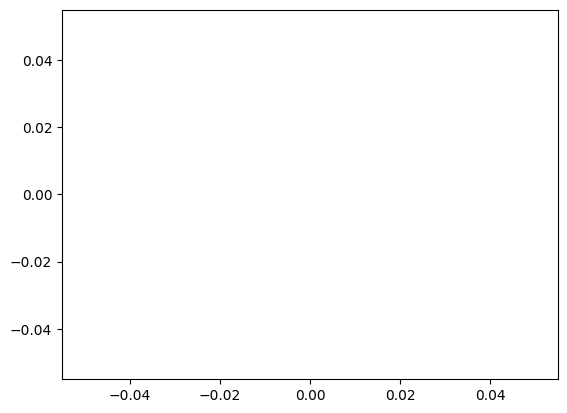

In [ ]:
import seaborn as sns

sns.histplot(data=weight_df, x="weight")

Normalize all weigth to kilograms (a pound = 0.453592 kg), store all the value in a data structure

Plot the graph of all detected weights